# Пробуем разные приколы! 

На самой первой паре мы много говорили про Keras, высокоуровневое API для Tensorflow. Он позволяет быстро и без боли учить нейронки, в которых не встречается особо много извращений. В этой тетрадке мы окунёмся в него чуть глубже. Работать по-прежнему будем с одеждой. 

In [1]:
import numpy as np
import tensorflow as tf
tf.__version__ 

'2.0.0'

In [2]:
from tensorflow.keras import Sequential
keras, L = tf.keras, tf.keras.layers

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

X_train = X_train / 255.
X_val = X_val / 255.
X_test = X_test / 255.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
X_train.shape, X_val.shape, X_test.shape

((50000, 28, 28), (10000, 28, 28), (10000, 28, 28))

# 1. Инициализация и батчнорм

Мы сегодня говорили о батч-нормализации и про то, как правильно в нейросетках делается инициализация весов. Давайте закрепим эти знания на практике, и переработаем их в навыки. 

In [5]:
# Помните зачем эта функция? :3 
# Мы довольно активно использовали её, когда говорили про градиентные спуски

def plot_history(histories, key='loss', start=0):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch[start:], history.history['val_'+key][start:],
                       #'--', 
                       label=name.title()+' Val')
            #plt.plot(history.epoch[start:], history.history[key][start:], color=val[0].get_color(),
            #     label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([start, max(history.epoch)])
    pass

### Задание 1:

Для начала реализуйте простую нейросеть:
* принимает на вход картинки размера 28 x 28
* вытягивает их в вектор (`keras.layers.Flatten`)
* пропускает через $6$ полносвязных слоёв с сотней нейронов и вашей любимой функцией активации
* на выходе предсказывает веротятности принадлежности к каждому из 10 классов
* при обучении сетки поставьте размер батча $512$, учите сетку $20$ эпох

__Важно:__ поскольку в y_train лежат номера классов, керасу нужно либо указать sparse функции потерь и метрики (`sparse_categorical_crossentropy` и `sparse_categorical_accuracy`), либо конвертировать y в one-hot формат.

__Ещё важнее:__ при большом батче модель будет быстрее проходить эпохи. Когда он очень большой, необходимо довольно много эпох для сходимости. Градиент обновляется редко. Когда размер батча совсем маленький, сетка может обучаться довольно шумно. 

In [6]:
# создайте сеть по инструкции выше
init = 'uniform'

model = Sequential()
model.add(L.InputLayer(input_shape=(28, 28)))
model.add(L.Flatten())

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())  

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())  

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())  

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())  

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU()) 

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU()) 

model.add(L.Dense(10, kernel_initializer=init))
model.add(L.Softmax())

model.compile("adam", "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

history1 = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=500, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 39us/sample - loss: 1.5646 - sparse_categorical_accuracy: 0.3616 - val_loss: 1.0836 - val_sparse_categorical_accuracy: 0.5310
Epoch 2/20
50000/50000 [==============================] - 1s 18us/sample - loss: 0.8881 - sparse_categorical_accuracy: 0.6356 - val_loss: 0.8209 - val_sparse_categorical_accuracy: 0.6712
Epoch 3/20
50000/50000 [==============================] - 1s 19us/sample - loss: 0.7640 - sparse_categorical_accuracy: 0.7036 - val_loss: 0.7210 - val_sparse_categorical_accuracy: 0.7208
Epoch 4/20
50000/50000 [==============================] - 1s 19us/sample - loss: 0.6624 - sparse_categorical_accuracy: 0.7538 - val_loss: 0.6369 - val_sparse_categorical_accuracy: 0.7647
Epoch 5/20
50000/50000 [==============================] - 1s 18us/sample - loss: 0.5734 - sparse_categorical_accuracy: 0.7928 - val_loss: 0.5663 - val_sparse_categorical_accuracy: 0.7954
Epoch 6/20
5000

### Задание 2:

Возьмите ту же нейросетку и в качестве инициализации используйте либо инициализацию Хе либо Глорота (в зависимости от выбранных вами функций активации). 

In [7]:
# создайте сеть по инструкции выше
init = 'he_uniform'

model = Sequential()
model.add(L.InputLayer(input_shape=(28, 28)))
model.add(L.Flatten())

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())  

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())  

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())  

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())  

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU()) 

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU()) 

model.add(L.Dense(10, kernel_initializer=init))
model.add(L.Softmax())

model.compile("adam", "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

history2 = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=500, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 31us/sample - loss: 0.7493 - sparse_categorical_accuracy: 0.7359 - val_loss: 0.4672 - val_sparse_categorical_accuracy: 0.8358
Epoch 2/20
50000/50000 [==============================] - 1s 20us/sample - loss: 0.4357 - sparse_categorical_accuracy: 0.8439 - val_loss: 0.4269 - val_sparse_categorical_accuracy: 0.8491
Epoch 3/20
50000/50000 [==============================] - 1s 21us/sample - loss: 0.3815 - sparse_categorical_accuracy: 0.8631 - val_loss: 0.3816 - val_sparse_categorical_accuracy: 0.8642
Epoch 4/20
50000/50000 [==============================] - 1s 20us/sample - loss: 0.3534 - sparse_categorical_accuracy: 0.8725 - val_loss: 0.3545 - val_sparse_categorical_accuracy: 0.8698
Epoch 5/20
50000/50000 [==============================] - 1s 21us/sample - loss: 0.3317 - sparse_categorical_accuracy: 0.8784 - val_loss: 0.3631 - val_sparse_categorical_accuracy: 0.8642
Epoch 6/20
5000

### Задание 3:

Берём ту же самую сетку и добавляем в неё батч-нормализацию после каждого слоя. Инициализацию замените назад на равномерную. 

In [10]:
# создайте сеть по инструкции выше
init = 'uniform'

model = Sequential()
model.add(L.InputLayer(input_shape=(28, 28)))
model.add(L.Flatten())

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization()) 
model.add(L.ReLU())  

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization()) 
model.add(L.ReLU())  

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization()) 
model.add(L.ReLU())  

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization()) 
model.add(L.ReLU())  

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization()) 
model.add(L.ReLU()) 

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization()) 
model.add(L.ReLU()) 

model.add(L.Dense(10, kernel_initializer=init))
model.add(L.Softmax())

model.compile("adam", "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

history3 = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=500, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 58us/sample - loss: 0.7311 - sparse_categorical_accuracy: 0.8080 - val_loss: 2.2447 - val_sparse_categorical_accuracy: 0.1019
Epoch 2/20
50000/50000 [==============================] - 1s 26us/sample - loss: 0.3677 - sparse_categorical_accuracy: 0.8712 - val_loss: 1.3708 - val_sparse_categorical_accuracy: 0.6745
Epoch 3/20
50000/50000 [==============================] - 1s 25us/sample - loss: 0.3145 - sparse_categorical_accuracy: 0.8884 - val_loss: 0.4439 - val_sparse_categorical_accuracy: 0.8655
Epoch 4/20
50000/50000 [==============================] - 1s 25us/sample - loss: 0.2815 - sparse_categorical_accuracy: 0.8975 - val_loss: 0.4035 - val_sparse_categorical_accuracy: 0.8525
Epoch 5/20
50000/50000 [==============================] - 1s 25us/sample - loss: 0.2639 - sparse_categorical_accuracy: 0.9031 - val_loss: 0.4242 - val_sparse_categorical_accuracy: 0.8531
Epoch 6/20
5000

### Задание 4:

А теперь сразу и инициализация и батч-нормализация.

In [12]:
# создайте сеть по инструкции выше
init = 'he_uniform'

model = Sequential()
model.add(L.InputLayer(input_shape=(28, 28)))
model.add(L.Flatten())

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization(trainable=False)) 
model.add(L.ReLU())  

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization(trainable=False)) 
model.add(L.ReLU())  

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization(trainable=False)) 
model.add(L.ReLU())  

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization(trainable=False)) 
model.add(L.ReLU())  

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization(trainable=False)) 
model.add(L.ReLU()) 

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization(trainable=False)) 
model.add(L.ReLU()) 

model.add(L.Dense(10, kernel_initializer=init))
model.add(L.Softmax())

model.compile("adam", "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

history15 = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=500, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 36us/sample - loss: 0.7356 - sparse_categorical_accuracy: 0.7440 - val_loss: 0.5215 - val_sparse_categorical_accuracy: 0.8090
Epoch 2/20
50000/50000 [==============================] - 1s 21us/sample - loss: 0.4293 - sparse_categorical_accuracy: 0.8457 - val_loss: 0.4336 - val_sparse_categorical_accuracy: 0.8420
Epoch 3/20
50000/50000 [==============================] - 1s 20us/sample - loss: 0.3811 - sparse_categorical_accuracy: 0.8618 - val_loss: 0.3802 - val_sparse_categorical_accuracy: 0.8570
Epoch 4/20
50000/50000 [==============================] - 1s 20us/sample - loss: 0.3494 - sparse_categorical_accuracy: 0.8737 - val_loss: 0.3715 - val_sparse_categorical_accuracy: 0.8628
Epoch 5/20
50000/50000 [==============================] - 1s 21us/sample - loss: 0.3270 - sparse_categorical_accuracy: 0.8792 - val_loss: 0.3423 - val_sparse_categorical_accuracy: 0.8735
Epoch 6/20
5000

### Задание 5:

Дело осталось за малым. Нарисовать траектории обучения всех сеток на одной картинке и сравнить их между собой.

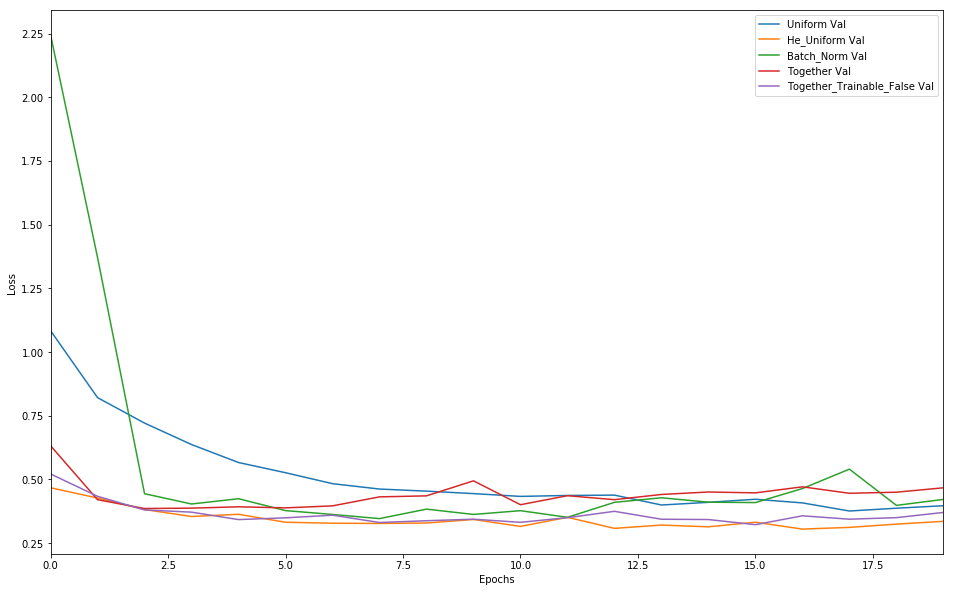

In [13]:
plot_history([('uniform', history1), 
              ('he_uniform', history2),
              ('batch_norm', history3),
              ('together', history4),
              ('together_trainable_false', history15)
             ],
             start=0)

## 2. Функции активации  

### Задание 6:

Давайте попробуем поймать эффект, когда у нашей нейронки наступает паралич. Возьмите самый первый вариант нейросетки и замените все функции активации на сигмоиды. 



In [55]:
# создайте сеть по инструкции выше
init = 'uniform'
act = 'sigmoid'

model = Sequential()
model.add(L.InputLayer(input_shape=(28, 28)))
model.add(L.Flatten())

model.add(L.Dense(100, kernel_initializer=init, activation=act))
model.add(L.Dense(100, kernel_initializer=init, activation=act)) 
model.add(L.Dense(100, kernel_initializer=init, activation=act))
model.add(L.Dense(100, kernel_initializer=init, activation=act))
model.add(L.Dense(100, kernel_initializer=init, activation=act))
model.add(L.Dense(100, kernel_initializer=init, activation=act))

model.add(L.Dense(10, kernel_initializer=init))
model.add(L.Softmax())

model.compile("adam", "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

history5 = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=500, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 33us/sample - loss: 2.3050 - sparse_categorical_accuracy: 0.0975 - val_loss: 2.3058 - val_sparse_categorical_accuracy: 0.1016
Epoch 2/20
50000/50000 [==============================] - 1s 19us/sample - loss: 2.3041 - sparse_categorical_accuracy: 0.1010 - val_loss: 2.3032 - val_sparse_categorical_accuracy: 0.1009
Epoch 3/20
50000/50000 [==============================] - 1s 19us/sample - loss: 2.3041 - sparse_categorical_accuracy: 0.1009 - val_loss: 2.3040 - val_sparse_categorical_accuracy: 0.0997
Epoch 4/20
50000/50000 [==============================] - 1s 21us/sample - loss: 2.3036 - sparse_categorical_accuracy: 0.1000 - val_loss: 2.3035 - val_sparse_categorical_accuracy: 0.0947
Epoch 5/20
50000/50000 [==============================] - 1s 22us/sample - loss: 2.3031 - sparse_categorical_accuracy: 0.0983 - val_loss: 2.3031 - val_sparse_categorical_accuracy: 0.0997
Epoch 6/20
5000

### Задание 7:  

Теперь попробуем взять вместо сигмоид elu

In [56]:
# создайте сеть по инструкции выше
init = 'uniform'
act = 'elu' # в таком варианте alpha = 1 
            # если хочется его подергать: L.ELU(alpha=1.0)

model = Sequential()
model.add(L.InputLayer(input_shape=(28, 28)))
model.add(L.Flatten())

model.add(L.Dense(100, kernel_initializer=init, activation=act))
model.add(L.Dense(100, kernel_initializer=init, activation=act)) 
model.add(L.Dense(100, kernel_initializer=init, activation=act))
model.add(L.Dense(100, kernel_initializer=init, activation=act))
model.add(L.Dense(100, kernel_initializer=init, activation=act))
model.add(L.Dense(100, kernel_initializer=init, activation=act))

model.add(L.Dense(10, kernel_initializer=init))
model.add(L.Softmax())

model.compile("adam", "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

history6 = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=500, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 26us/sample - loss: 1.1933 - sparse_categorical_accuracy: 0.5431 - val_loss: 0.8023 - val_sparse_categorical_accuracy: 0.6918
Epoch 2/20
50000/50000 [==============================] - 1s 15us/sample - loss: 0.7134 - sparse_categorical_accuracy: 0.7354 - val_loss: 0.6605 - val_sparse_categorical_accuracy: 0.7586
Epoch 3/20
50000/50000 [==============================] - 1s 14us/sample - loss: 0.6255 - sparse_categorical_accuracy: 0.7665 - val_loss: 0.6080 - val_sparse_categorical_accuracy: 0.7691
Epoch 4/20
50000/50000 [==============================] - 1s 14us/sample - loss: 0.5714 - sparse_categorical_accuracy: 0.7863 - val_loss: 0.6062 - val_sparse_categorical_accuracy: 0.7709
Epoch 5/20
50000/50000 [==============================] - 1s 14us/sample - loss: 0.5392 - sparse_categorical_accuracy: 0.7983 - val_loss: 0.5311 - val_sparse_categorical_accuracy: 0.7957
Epoch 6/20
5000

### Задание 8:

Снова сравниваем модели между собой.

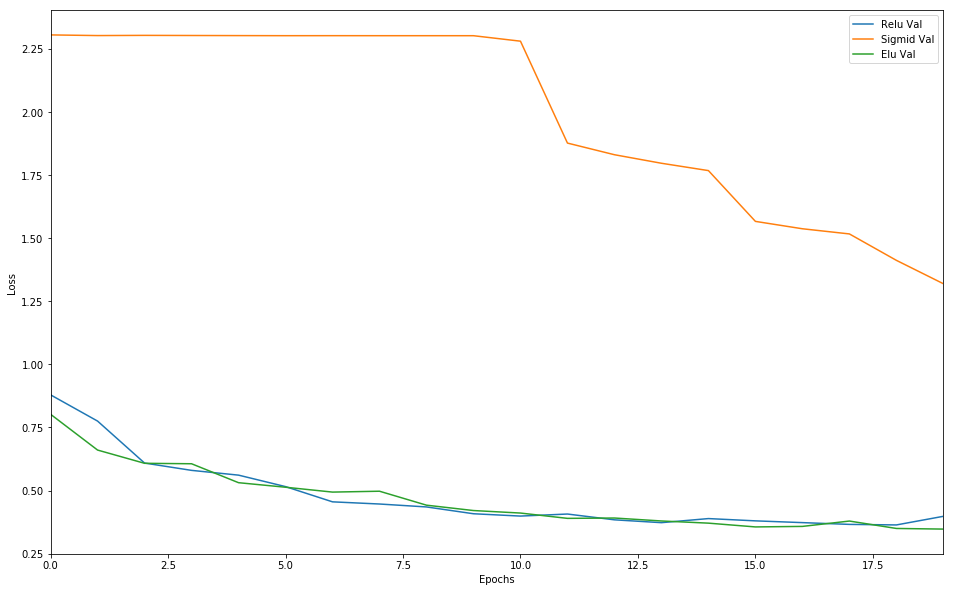

In [57]:
plot_history([('relu', history1), 
              ('sigmid', history5),
              ('elu', history6),
             ],
             start=0)

### Задание 9:

Сравнить Хе + BN с Xe + BN(c trainable False).

### Задание 10:

Сравнить Dropout + BN c разным p.

# 3. Keras бывет разным, про skip-connection

На первой паре мы с вами говорили, что в Keras задавать модели можно по-разному. Второй способ делать это: функциональный стиль. Он даёт на порядок больше возможностей. Давайте посмотрим как это выглядит и попробуем собрать пару моделей. 

In [63]:
init = 'uniform'
act = 'relu'

input_tensor = L.Input(shape=(28, 28))

x = L.Flatten()(input_tensor)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
output_tensor = L.Dense(10, kernel_initializer=init, activation='softmax')(x)

model = keras.Model(input_tensor, output_tensor)

In [65]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1, batch_size=500, verbose=1)

Train on 50000 samples, validate on 10000 samples
50000/50000 [==============================] - 1s 23us/sample - loss: 0.4741 - sparse_categorical_accuracy: 0.8338 - val_loss: 0.4754 - val_sparse_categorical_accuracy: 0.8343


Помните статью про то, как люди рисовали функции потерь? [Теперь появилась галерея!](https://losslandscape.com/gallery/) На паре про градиентный спуск мы говорили, что skip-connection довольно здорово меняет ландшафт функции потерь. 

![](https://i.stack.imgur.com/UDvbg.png)

Такую модель нельзя собрать через `Sequence`-стиль, но можно через функциональный стиль. Давайте попробуем сделать это. Заодно посмотрим насколько сильно в нашей ситуации будет меняться траектория обучения. 

In [74]:
init = 'he_uniform'
act = 'relu'

input_tensor = L.Input(shape=(28, 28))

x = L.Flatten()(input_tensor)
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x1)
x = L.concatenate([x, x1])

x1 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.concatenate([x, x1])

x1 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.concatenate([x, x1])

output_tensor = L.Dense(10, kernel_initializer=init, activation='softmax')(x)

model = keras.Model(input_tensor, output_tensor)

model.compile("adam", "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

history8 = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=500, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 43us/sample - loss: 0.6607 - sparse_categorical_accuracy: 0.7730 - val_loss: 0.4577 - val_sparse_categorical_accuracy: 0.8357
Epoch 2/20
50000/50000 [==============================] - 1s 19us/sample - loss: 0.4192 - sparse_categorical_accuracy: 0.8488 - val_loss: 0.3891 - val_sparse_categorical_accuracy: 0.8586
Epoch 3/20
50000/50000 [==============================] - 1s 17us/sample - loss: 0.3620 - sparse_categorical_accuracy: 0.8683 - val_loss: 0.3688 - val_sparse_categorical_accuracy: 0.8699
Epoch 4/20
50000/50000 [==============================] - 1s 20us/sample - loss: 0.3446 - sparse_categorical_accuracy: 0.8759 - val_loss: 0.3500 - val_sparse_categorical_accuracy: 0.8710
Epoch 5/20
50000/50000 [==============================] - 1s 22us/sample - loss: 0.3107 - sparse_categorical_accuracy: 0.8860 - val_loss: 0.3649 - val_sparse_categorical_accuracy: 0.8685
Epoch 6/20
5000

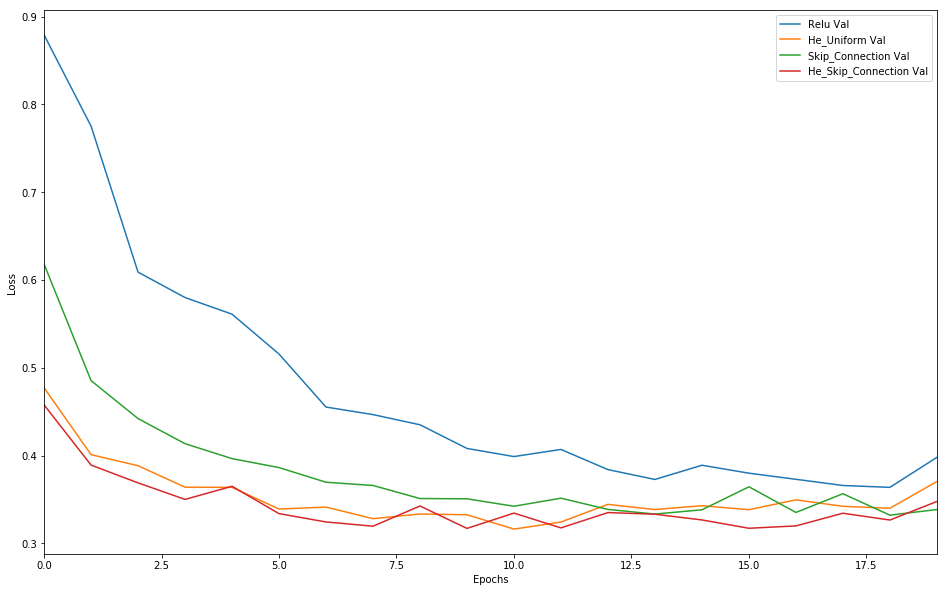

In [75]:
plot_history([('relu', history1), 
              ('he_uniform', history2),
              ('skip_connection', history7),
              ('he_skip_connection', history8),
             ],
             start=0)

# 4. Ещё немного функционального API 


## 4.1 Несколько входов

В этом примере на вход идёт две картинки.

In [91]:
input_1 = L.Input(shape=(28, 28))
input_2 = L.Input(shape=(28, 28))

x1 = L.Flatten()(input_1)
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x1)
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x1)

x2 = L.Flatten()(input_2)
x2 = L.Dense(100, kernel_initializer=init, activation=act)(x2)
x2 = L.Dense(100, kernel_initializer=init, activation=act)(x2)

x = L.concatenate([x1, x2])
output = L.Dense(10, kernel_initializer=init, activation='softmax')(x)

model = keras.Model([input_1, input_2], output)
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_61 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
input_62 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_57 (Flatten)            (None, 784)          0           input_61[0][0]                   
__________________________________________________________________________________________________
flatten_58 (Flatten)            (None, 784)          0           input_62[0][0]                   
___________________________________________________________________________________________

Немного бессмысленный пример обучения, когда на вход идут две одинаковые картиночки.

In [87]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

model.fit([X_train, X_train], y_train, validation_data=([X_val, X_val], y_val),
          epochs=2, batch_size=500)

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 1s 17us/sample - loss: 0.2929 - sparse_categorical_accuracy: 0.8929 - val_loss: 0.3245 - val_sparse_categorical_accuracy: 0.8836
Epoch 2/2
50000/50000 [==============================] - 1s 17us/sample - loss: 0.2819 - sparse_categorical_accuracy: 0.8969 - val_loss: 0.3271 - val_sparse_categorical_accuracy: 0.8790


## 4.2 Несколько выходов и функций потерь

In [100]:
init = 'uniform'
act = 'relu'

input_tensor = L.Input(shape=(28, 28))

x = L.Flatten()(input_tensor)
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x2 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x3 = L.Dense(100, kernel_initializer=init, activation=act)(x)

output_1 = L.Dense(10, kernel_initializer=init, activation='softmax')(x1)
output_2 = L.Dense(10, kernel_initializer=init, activation='softmax')(x2)
output_3 = L.Dense(10, kernel_initializer=init, activation='softmax')(x3)

model = keras.Model(input_tensor, [output_1, output_2, output_3])

model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_65 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_61 (Flatten)            (None, 784)          0           input_65[0][0]                   
__________________________________________________________________________________________________
dense_284 (Dense)               (None, 100)          78500       flatten_61[0][0]                 
__________________________________________________________________________________________________
dense_285 (Dense)               (None, 100)          78500       flatten_61[0][0]                 
___________________________________________________________________________________________

In [102]:
model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy',
                                      'sparse_categorical_crossentropy', 
                                      'sparse_categorical_crossentropy'],
                                    loss_weights=[0.25, 1., 10.])

model.fit(X_train, [y_train, y_train, y_train], epochs=2, batch_size=500)

Train on 50000 samples
Epoch 1/2
50000/50000 [==============================] - 1s 23us/sample - loss: 10.8418 - dense_287_loss: 0.9584 - dense_288_loss: 0.9684 - dense_289_loss: 0.9634
Epoch 2/2
50000/50000 [==============================] - 1s 14us/sample - loss: 6.0745 - dense_287_loss: 0.5321 - dense_288_loss: 0.5349 - dense_289_loss: 0.5407


Пример с разными функциями потерь: